In [1]:
import pandas as pd
import numpy as np
import pymannkendall as mk
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath('F:/portneuf/analysis/utils/'))
import trend_sen

In [2]:
df = pd.read_csv('NLCD_percent.csv')
df_c = pd.read_csv('NLCD_pixel_count.csv')

In [3]:
df

,Year,huc12,Shrub/Scrub,Open_Water,Emergent_Herbaceous_Wetlands,Barren_Land,Grassland/Herbaceous,"Developed,_High_Intensity",Woody_Wetlands,Evergreen_Forest,Cultivated_Crops,Pasture/Hay,"Developed,_Medium_Intensity",Deciduous_Forest,"Developed,_Low_Intensity","Developed,_Open_Space"
0,2000,170402080108,60.560374,0.010956,1.098630,NaN,0.900755,0.000783,0.290646,6.548526,17.665854,9.285631,0.004696,1.526074,0.369856,1.737219
1,2000,170402080305,81.128129,0.140663,NaN,0.014476,0.680377,NaN,0.013160,5.562198,10.283641,0.240830,NaN,0.244385,0.319589,1.372551
2,2000,170402080306,56.729118,0.000135,0.347608,NaN,2.487321,NaN,0.014268,3.710427,32.863111,1.213366,0.010701,0.144974,0.398555,2.080414
3,2000,170402080201,61.456172,0.003119,0.176220,NaN,0.014035,NaN,0.062232,5.553071,27.924248,0.001559,NaN,3.778838,0.056153,0.974352
4,2000,170402080203,66.156518,NaN,NaN,NaN,0.002655,NaN,0.005311,20.230732,10.912016,NaN,0.049816,0.631972,0.635950,1.375031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,2023,170402080206,39.775795,NaN,0.024721,NaN,0.043857,NaN,0.811807,53.891311,NaN,0.002354,NaN,4.582372,0.272381,0.595401
1100,2023,170402080501,63.551564,0.001731,0.017309,NaN,0.071494,0.000865,0.629402,16.673675,3.604654,0.047600,0.011251,13.593346,0.913301,0.883807
1101,2023,170402080502,60.246249,NaN,0.053658,NaN,0.737562,0.005722,0.399689,27.153245,1.018395,1.452553,0.215076,4.188309,1.919496,2.610045
1102,2023,170402080603,52.865294,NaN,0.359974,NaN,8.892187,NaN,3.262120,20.212435,4.893233,1.004170,NaN,7.600824,0.153362,0.756401


In [4]:
df_c

,Year,huc12,Shrub/Scrub,Open_Water,Emergent_Herbaceous_Wetlands,Barren_Land,Grassland/Herbaceous,"Developed,_High_Intensity",Woody_Wetlands,Evergreen_Forest,Cultivated_Crops,Pasture/Hay,"Developed,_Medium_Intensity",Deciduous_Forest,"Developed,_Low_Intensity","Developed,_Open_Space"
0,2000,170402080108,77385.050980,14.000000,1403.847059,NaN,1151.000000,1.000000,371.392157,8367.815686,22573.721569,11865.333333,6.000000,1950.043137,472.607843,2219.847059
1,2000,170402080305,61647.086275,106.886275,NaN,11.0,517.000000,NaN,10.000000,4226.564706,7814.262745,183.000000,NaN,185.701961,242.847059,1042.964706
2,2000,170402080306,47710.227451,0.113725,292.345098,NaN,2091.882353,NaN,12.000000,3120.537255,27638.478431,1020.462745,9.000000,121.925490,335.192157,1749.666667
3,2000,170402080201,39408.329412,2.000000,113.000000,NaN,9.000000,NaN,39.905882,3560.866667,17906.223529,1.000000,NaN,2423.152941,36.007843,624.796078
4,2000,170402080203,24914.482353,NaN,NaN,NaN,1.000000,NaN,2.000000,7618.874510,4109.454902,NaN,18.760784,238.000000,239.498039,517.835294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,2023,170402080206,33788.450980,NaN,21.000000,NaN,37.254902,NaN,689.607843,45779.196078,NaN,2.000000,NaN,3892.600000,231.380392,505.776471
1100,2023,170402080501,73430.709804,2.000000,20.000000,NaN,82.607843,1.000000,727.243137,19265.611765,4165.000000,55.000000,13.000000,15706.443137,1055.274510,1021.196078
1101,2023,170402080502,29192.513725,NaN,26.000000,NaN,357.388235,2.772549,193.670588,13157.192157,493.466667,703.839216,104.215686,2029.458824,930.098039,1264.705882
1102,2023,170402080603,60501.121569,NaN,411.968627,NaN,10176.568627,NaN,3733.298039,23131.905882,5600.007843,1149.211765,NaN,8698.682353,175.513725,865.654902


In [5]:
df_c['Cultivated_area'] = df_c['Cultivated_Crops'] * 0.22 #each puxel is 30m2 = 0.22 acres

In [6]:
df.columns

Index(['Year', 'huc12', 'Shrub/Scrub', 'Open_Water',
       'Emergent_Herbaceous_Wetlands', 'Barren_Land', 'Grassland/Herbaceous',
       'Developed,_High_Intensity', 'Woody_Wetlands', 'Evergreen_Forest',
       'Cultivated_Crops', 'Pasture/Hay', 'Developed,_Medium_Intensity',
       'Deciduous_Forest', 'Developed,_Low_Intensity',
       'Developed,_Open_Space'],
      dtype='object')

In [7]:
df_cl = df[['Year', 'huc12', 'Cultivated_Crops']].merge(df_c[['Year', 'huc12', 'Cultivated_area']], on=['huc12', 'Year'], how='left')

In [8]:
df_cl

,Year,huc12,Cultivated_Crops,Cultivated_area
0,2000,170402080108,17.665854,4966.218745
1,2000,170402080305,10.283641,1719.137804
2,2000,170402080306,32.863111,6080.465255
3,2000,170402080201,27.924248,3939.369176
4,2000,170402080203,10.912016,904.080078
...,...,...,...,...
1099,2023,170402080206,NaN,NaN
1100,2023,170402080501,3.604654,916.300000
1101,2023,170402080502,1.018395,108.562667
1102,2023,170402080603,4.893233,1232.001725


In [9]:
var_cols = ['Cultivated_Crops', 'Cultivated_area']

In [10]:
trend_df = trend_sen.analyze_trends(df_cl, var_list = var_cols, sort_yr='Year') 

In [11]:
trend_df

,huc12,Cultivated_Crops_slope,Cultivated_Crops_p,Cultivated_Crops_trend,Cultivated_area_slope,Cultivated_area_p,Cultivated_area_trend
0,170402080101,-0.085547,4.035889e-10,decreasing,-20.406483,4.035889e-10,decreasing
1,170402080102,-0.084225,6.562275e-10,decreasing,-20.997715,6.562275e-10,decreasing
2,170402080103,NaN,NaN,None,NaN,NaN,None
3,170402080104,-0.004372,2.861573e-01,no trend,-0.800130,2.861573e-01,no trend
4,170402080105,0.234488,1.207086e-04,increasing,47.809875,1.207086e-04,increasing
5,170402080106,0.020476,4.457702e-06,increasing,3.478322,4.457702e-06,increasing
6,170402080107,0.105826,3.706523e-03,increasing,23.956493,3.706523e-03,increasing
7,170402080108,0.090699,1.026613e-06,increasing,25.497155,1.026613e-06,increasing
8,170402080201,0.189997,1.931614e-03,increasing,26.803470,1.931614e-03,increasing
9,170402080202,0.177095,3.499863e-02,increasing,61.523566,3.499863e-02,increasing


In [12]:
summary_df = trend_sen.summarize_trends(trend_df, var_cols)

In [13]:
summary_df

,Variable,Increasing,Decreasing,No Trend
0,Cultivated_Crops,17,18,9
1,Cultivated_area,17,18,9


In [14]:
gdf = gpd.read_file('../portneuf_huc12/portneuf_huc12.shp')

In [15]:
# Make sure HUC12 in shapefile and trend_df match in type
gdf['huc12'] = gdf['huc12'].astype(str)
trend_df['huc12'] = trend_df['huc12'].astype(str)

In [16]:
merged_gdf = gdf.merge(trend_df, left_on='huc12', right_on='huc12')

Saved: graphics/ca_pp_trend_map.png


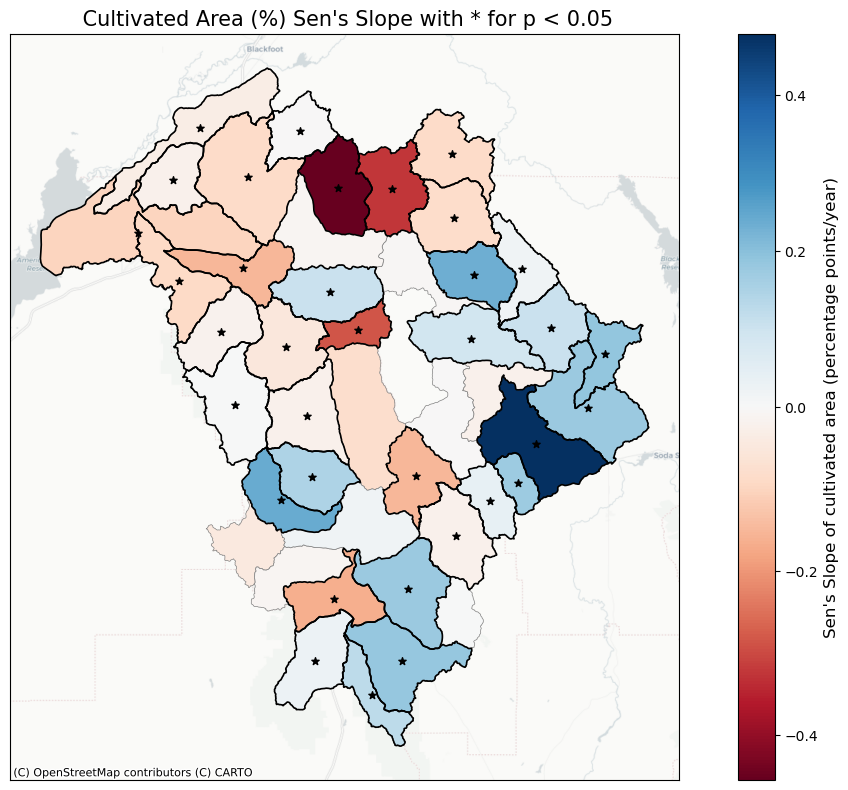

In [17]:
trend_sen.plot_trend_map(
    gdf=merged_gdf,
    slope_col=f'Cultivated_Crops_slope',
    pval_col=f'Cultivated_Crops_p',
    title=f" Cultivated Area (%) Sen's Slope with * for p < 0.05",
    cbar_label=f"Sen's Slope of cultivated area (percentage points/year)",
    vmin=None,
    vmax=None,
    cmap= 'RdBu',
    center_zero=True,
    show_significance_border=True,
    show_significance_marker=True,
    basemap=True,
    save_path= f'graphics/ca_pp_trend_map.png',
)

Saved: graphics/cc_ac_trend_map.png


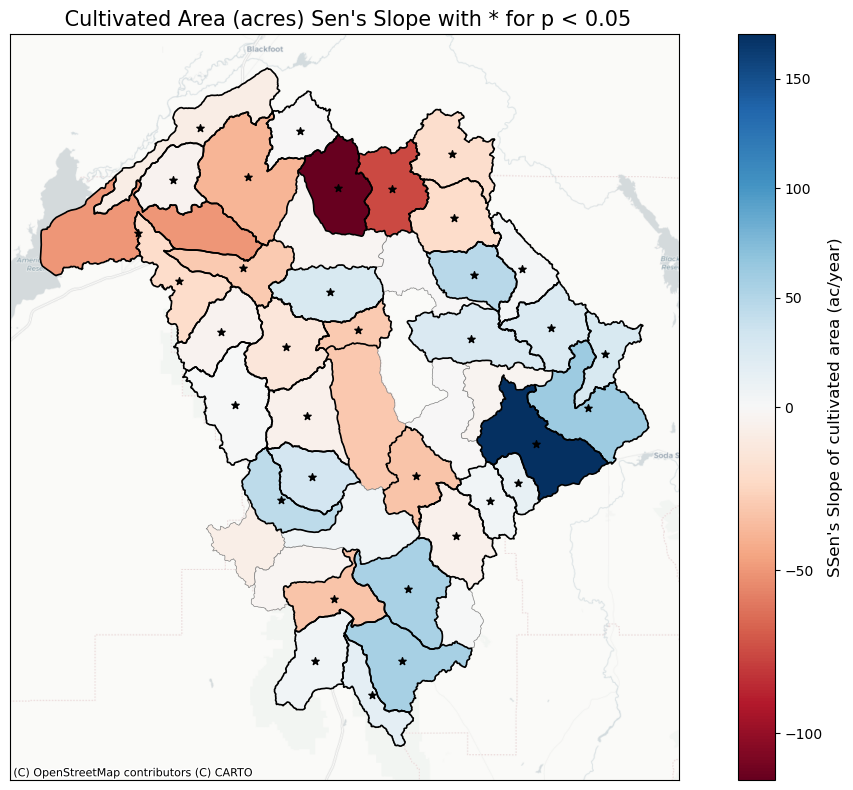

In [18]:
trend_sen.plot_trend_map(
    gdf=merged_gdf,
    slope_col=f'Cultivated_area_slope',
    pval_col=f'Cultivated_area_p',
    title=f" Cultivated Area (acres) Sen's Slope with * for p < 0.05",
    cbar_label=f"SSen's Slope of cultivated area (ac/year)",
    vmin=None,
    vmax=None,
    cmap= 'RdBu',
    center_zero=True,
    show_significance_border=True,
    show_significance_marker=True,
    basemap=True,
    save_path= f'graphics/cc_ac_trend_map.png',
)

In [19]:
major_classes = ['Shrub/Scrub',
 'Cultivated_Crops',
 'Evergreen_Forest',
 'Grassland/Herbaceous',
 'Deciduous_Forest',
 'Developed,_Low_Intensity']

In [20]:
df_major = df.groupby('huc12')[major_classes].mean().reset_index()

In [21]:
df_major['huc12'] = df_major['huc12'].astype(str)
# Merge the long-term statistics with the HUC12 GeoDataFrame (huc12_gdf)
huc12_gdf = gdf.merge(df_major, on='huc12', how='left')

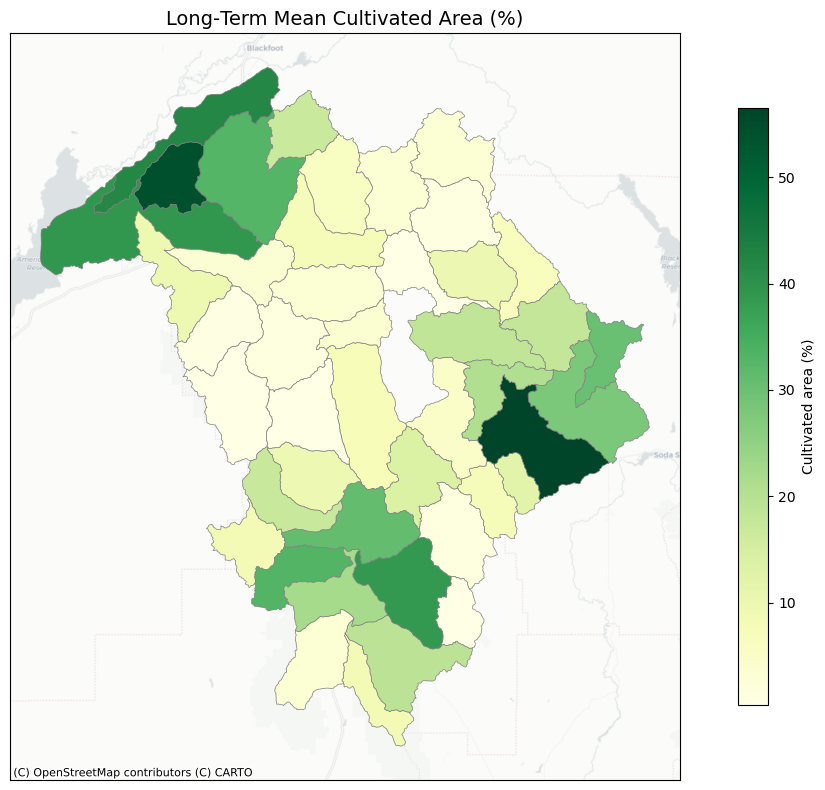

In [22]:
trend_sen.plot_gdf(
    huc12_gdf,
    column='Cultivated_Crops',
    cmap='YlGn',
    legend_label='Cultivated area (%)',
    figsize=(12, 8),
    basemap=True,
    save_path='graphics/long_term_cl_huc12.png', #'ppt_mean_map.png',
    title='Long‑Term Mean Cultivated Area (%)'
)


In [23]:
df_major.columns

Index(['huc12', 'Shrub/Scrub', 'Cultivated_Crops', 'Evergreen_Forest',
       'Grassland/Herbaceous', 'Deciduous_Forest', 'Developed,_Low_Intensity'],
      dtype='object')

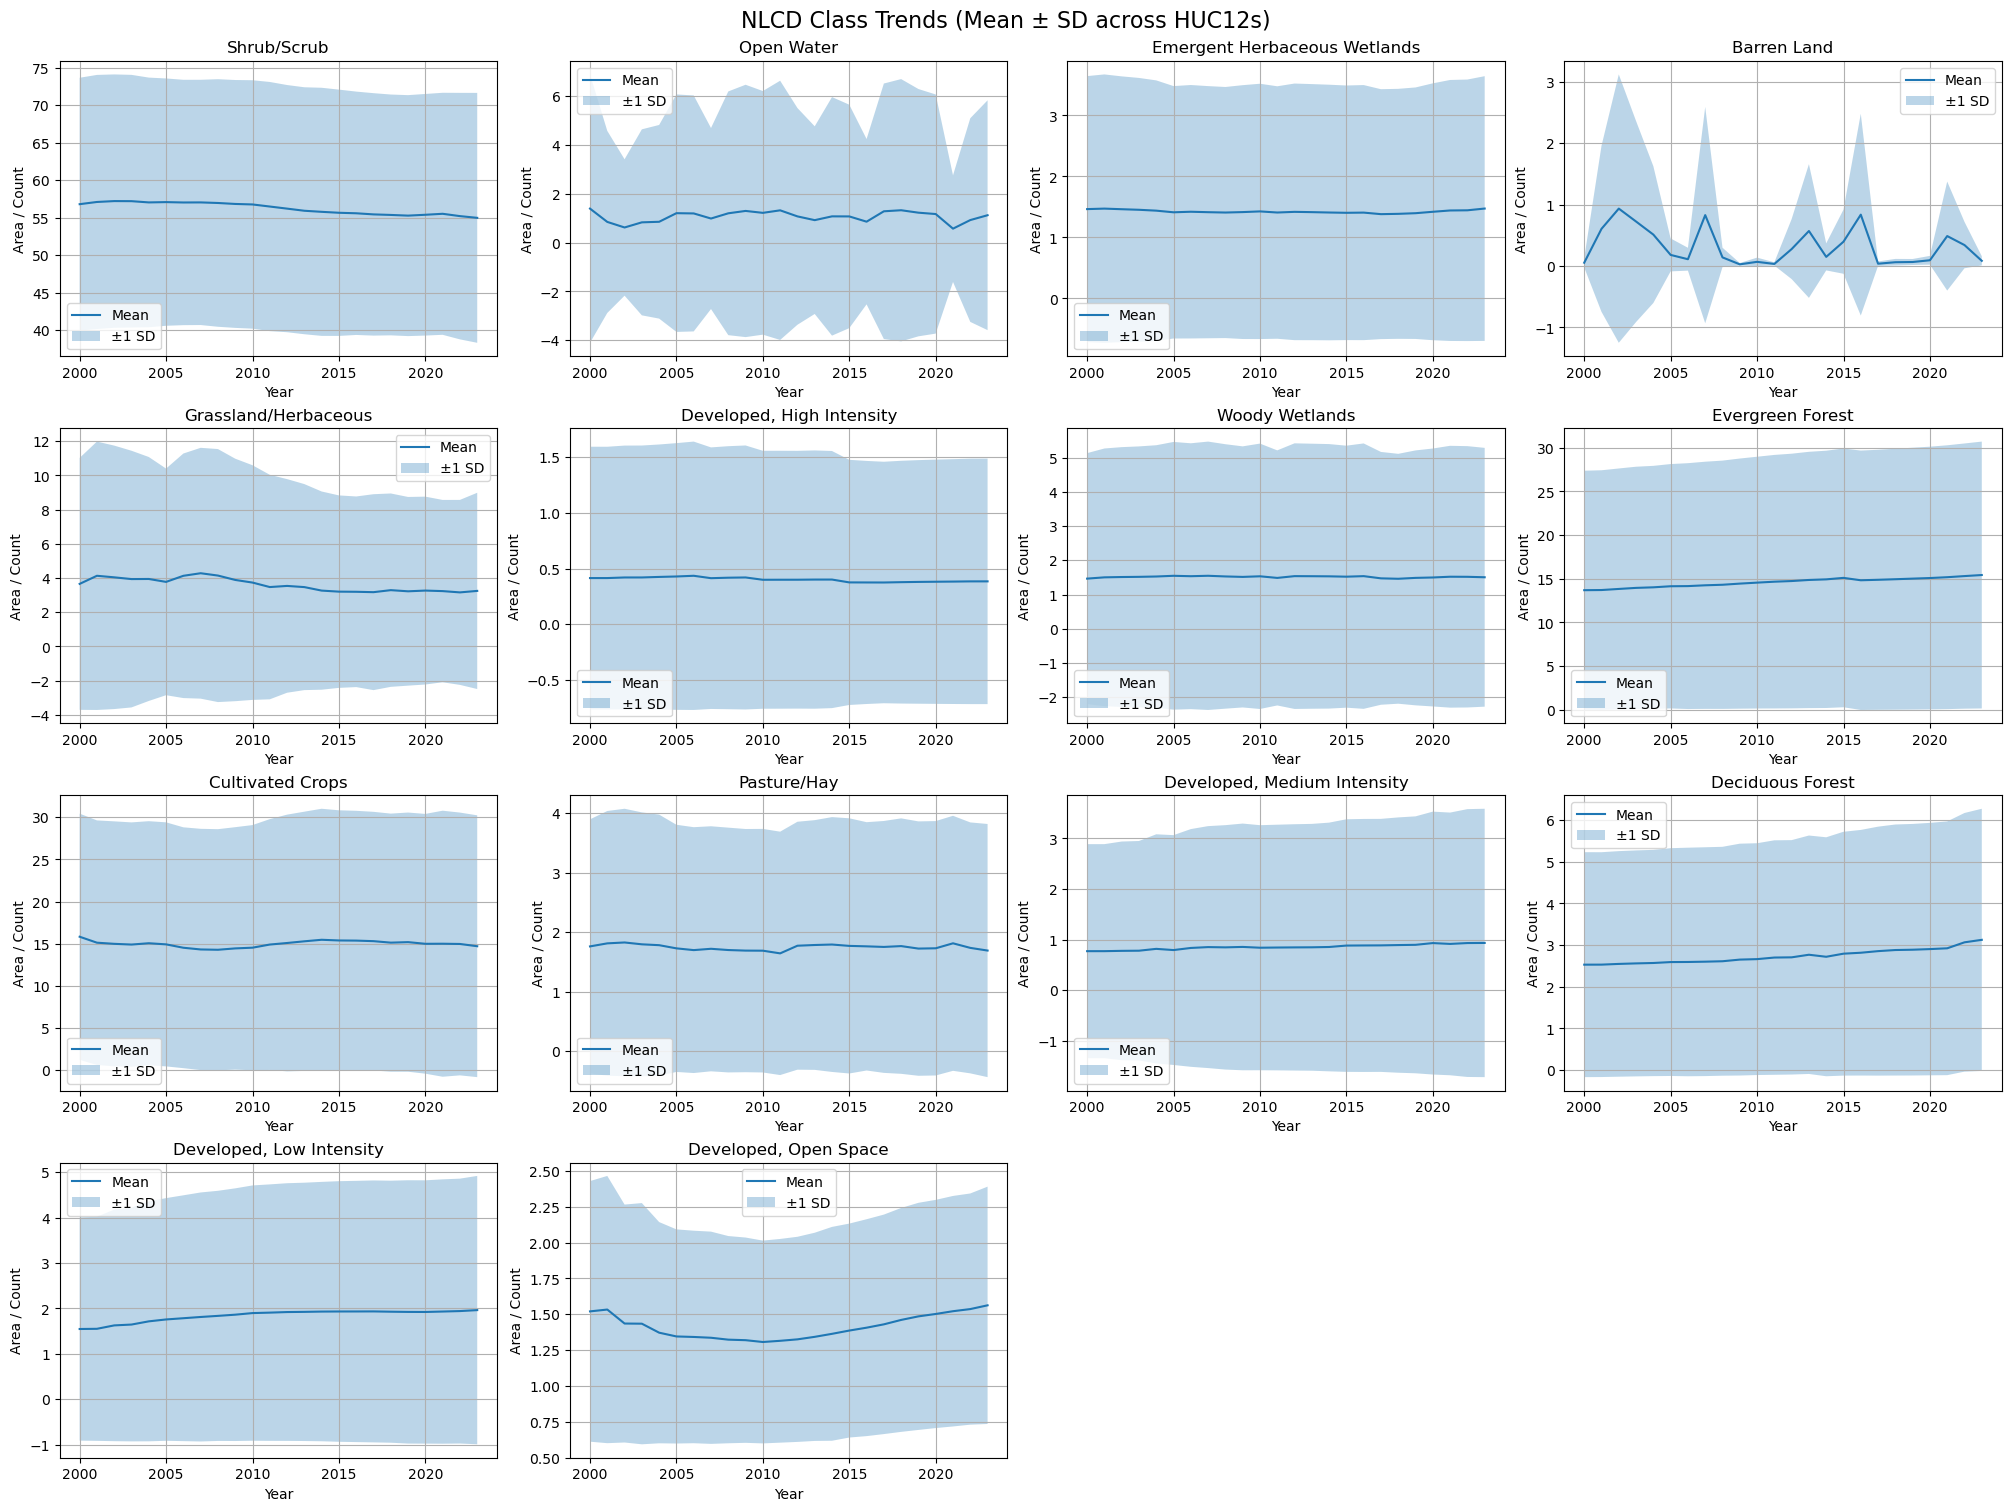

In [24]:
nlcd_columns = ['Shrub/Scrub', 'Open_Water', 'Emergent_Herbaceous_Wetlands', 'Barren_Land',
                'Grassland/Herbaceous', 'Developed,_High_Intensity', 'Woody_Wetlands',
                'Evergreen_Forest', 'Cultivated_Crops', 'Pasture/Hay',
                'Developed,_Medium_Intensity', 'Deciduous_Forest',
                'Developed,_Low_Intensity', 'Developed,_Open_Space']

# Group by Year and calculate mean and std for each NLCD class
grouped = df.groupby('Year')[nlcd_columns].agg(['mean', 'std'])

# Set up subplots
ncols = 4
nrows = int(len(nlcd_columns) / ncols) + (len(nlcd_columns) % ncols > 0)
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 15), constrained_layout=True)
axes = axes.flatten()

# Plot each NLCD class
for i, col in enumerate(nlcd_columns):
    ax = axes[i]
    years = grouped.index
    mean_vals = grouped[(col, 'mean')]
    std_vals = grouped[(col, 'std')]

    ax.plot(years, mean_vals, label='Mean')
    ax.fill_between(years, mean_vals - std_vals, mean_vals + std_vals, alpha=0.3, label='±1 SD')
    ax.set_title(col.replace('_', ' '))
    ax.set_xlabel('Year')
    ax.set_ylabel('Area / Count')
    ax.grid(True)
    ax.legend()

# Hide unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('NLCD Class Trends (Mean ± SD across HUC12s)', fontsize=16)
plt.show()


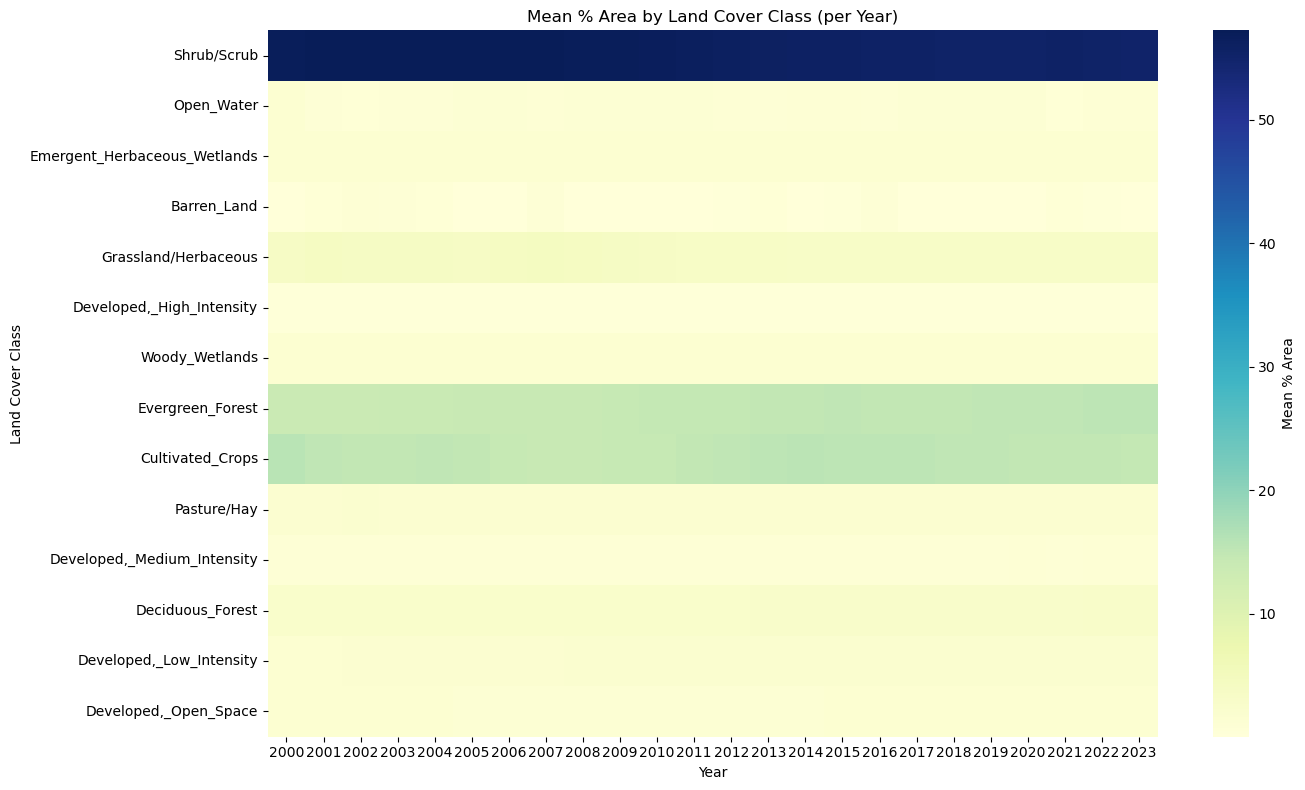

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group and compute mean percentage per year
mean_pct = df.groupby('Year')[nlcd_columns].mean()

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(mean_pct.T, cmap='YlGnBu', cbar_kws={'label': 'Mean % Area'}, annot=False)
plt.title('Mean % Area by Land Cover Class (per Year)')
plt.xlabel('Year')
plt.ylabel('Land Cover Class')
plt.tight_layout()
plt.show()



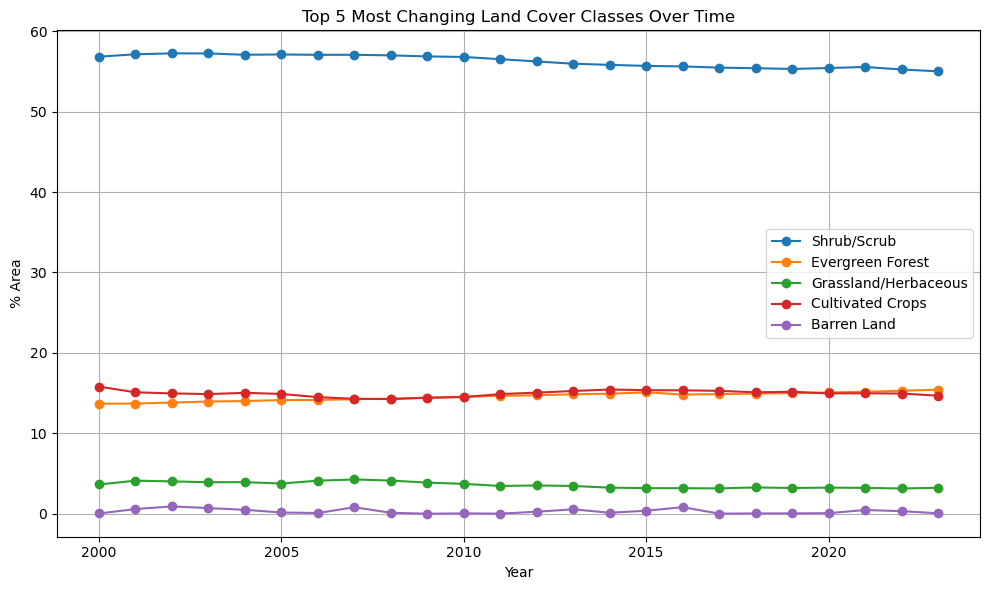

In [26]:
# Calculate standard deviation across years for each class
std_over_time = mean_pct.std()
top5 = std_over_time.sort_values(ascending=False).head(5).index.tolist()

# Plot trends
plt.figure(figsize=(10, 6))
for col in top5:
    plt.plot(mean_pct.index, mean_pct[col], marker='o', label=col.replace('_', ' '))
    
plt.title('Top 5 Most Changing Land Cover Classes Over Time')
plt.xlabel('Year')
plt.ylabel('% Area')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


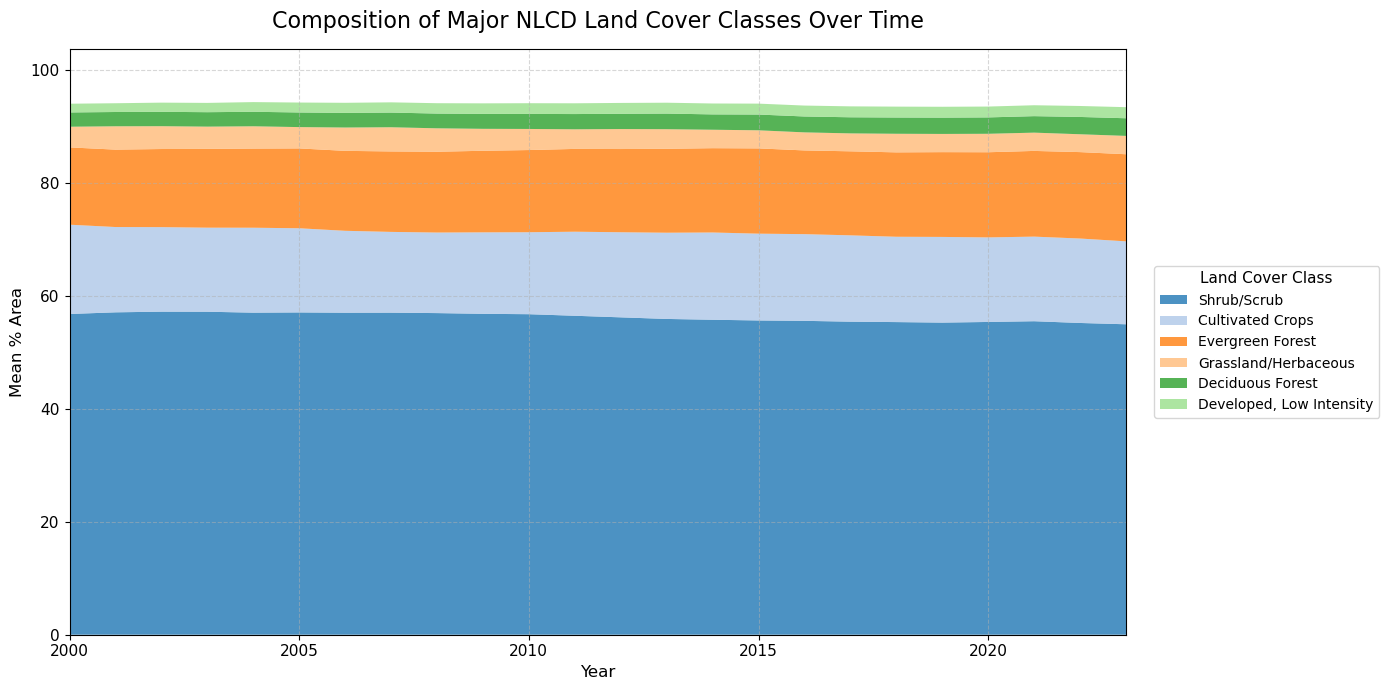

In [27]:
# Filter top 6 major land classes by overall mean
major_classes = mean_pct.mean().sort_values(ascending=False).head(6).index.tolist()
stack_data = mean_pct[major_classes]

# Define color palette (optional, choose based on preference)
colors = plt.get_cmap('tab20').colors[:len(major_classes)]

# Create subplot figure manually
fig, ax = plt.subplots(figsize=(14, 7))

# Plot stacked area
ax.stackplot(stack_data.index, stack_data.T, labels=[c.replace('_', ' ') for c in major_classes], colors=colors, alpha=0.8)

# Enhancements
ax.set_title('Composition of Major NLCD Land Cover Classes Over Time', fontsize=16,  pad=15)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Mean % Area', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xlim(stack_data.index.min(), stack_data.index.max())
ax.set_ylim(0, stack_data.sum(axis=1).max() * 1.1)

# Add legend outside the plot
ax.legend(title='Land Cover Class', loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=10, title_fontsize=11)

# Ticks
ax.tick_params(axis='both', which='major', labelsize=11)

plt.tight_layout()
plt.savefig('graphics/major_classes_trend.png', bbox_inches='tight')
plt.show()


In [30]:
mean_pct

,Shrub/Scrub,Open_Water,Emergent_Herbaceous_Wetlands,Barren_Land,Grassland/Herbaceous,"Developed,_High_Intensity",Woody_Wetlands,Evergreen_Forest,Cultivated_Crops,Pasture/Hay,"Developed,_Medium_Intensity",Deciduous_Forest,"Developed,_Low_Intensity","Developed,_Open_Space"
Year,,,,,,,,,,,,,,
2000,56.816721,1.389516,1.464115,0.052921,3.658916,0.414494,1.464324,13.694967,15.817998,1.759573,0.771975,2.530107,1.547363,1.519945
2001,57.110616,0.844759,1.472231,0.604858,4.132900,0.414513,1.501692,13.713270,15.109919,1.810632,0.772130,2.530884,1.551718,1.532785
2002,57.228178,0.617331,1.462330,0.934350,4.042085,0.419838,1.511100,13.837608,14.974550,1.825585,0.778210,2.548074,1.626634,1.435224
2003,57.217238,0.827594,1.453032,0.723774,3.939465,0.419951,1.516450,13.959310,14.888452,1.794558,0.781094,2.560451,1.645322,1.434145
2004,57.051809,0.850417,1.438726,0.510902,3.945642,0.424796,1.526359,14.023510,15.045461,1.780036,0.817539,2.570168,1.715708,1.371432
2005,57.091629,1.202433,1.411784,0.179950,3.775147,0.428720,1.547049,14.146375,14.910434,1.726729,0.793774,2.592119,1.757566,1.345181
2006,57.042274,1.192236,1.420911,0.110206,4.131701,0.435044,1.535139,14.163126,14.510212,1.697240,0.835519,2.594592,1.784559,1.341610
2007,57.052007,0.983639,1.413551,0.828375,4.281853,0.413525,1.547581,14.255604,14.306156,1.719370,0.852384,2.601764,1.811970,1.336069
2008,56.975201,1.197723,1.407920,0.139832,4.145631,0.417817,1.528152,14.317604,14.269567,1.698454,0.847167,2.612046,1.836373,1.322792


In [31]:
mean_pct.mean().sort_values(ascending=False)

Shrub/Scrub                     56.259734
Cultivated_Crops                14.975311
Evergreen_Forest                14.589246
Grassland/Herbaceous             3.601331
Deciduous_Forest                 2.733338
Developed,_Low_Intensity         1.838828
Pasture/Hay                      1.746118
Woody_Wetlands                   1.513743
Emergent_Herbaceous_Wetlands     1.424620
Developed,_Open_Space            1.412488
Open_Water                       1.063445
Developed,_Medium_Intensity      0.854023
Developed,_High_Intensity        0.401140
Barren_Land                      0.316874
dtype: float64

In [32]:
stack_data

,Shrub/Scrub,Cultivated_Crops,Evergreen_Forest,Grassland/Herbaceous,Deciduous_Forest,"Developed,_Low_Intensity"
Year,,,,,,
2000,56.816721,15.817998,13.694967,3.658916,2.530107,1.547363
2001,57.110616,15.109919,13.713270,4.132900,2.530884,1.551718
2002,57.228178,14.974550,13.837608,4.042085,2.548074,1.626634
2003,57.217238,14.888452,13.959310,3.939465,2.560451,1.645322
2004,57.051809,15.045461,14.023510,3.945642,2.570168,1.715708
2005,57.091629,14.910434,14.146375,3.775147,2.592119,1.757566
2006,57.042274,14.510212,14.163126,4.131701,2.594592,1.784559
2007,57.052007,14.306156,14.255604,4.281853,2.601764,1.811970
2008,56.975201,14.269567,14.317604,4.145631,2.612046,1.836373


In [28]:
t= df[df['huc12'] == 170402080108]
# for col in t.columns[2:]:
#     fig, ax = plt.subplots()
#     ax.plot(t['Year'], t[col], marker='o', linestyle='-')
#     ax.set_title(col)

    

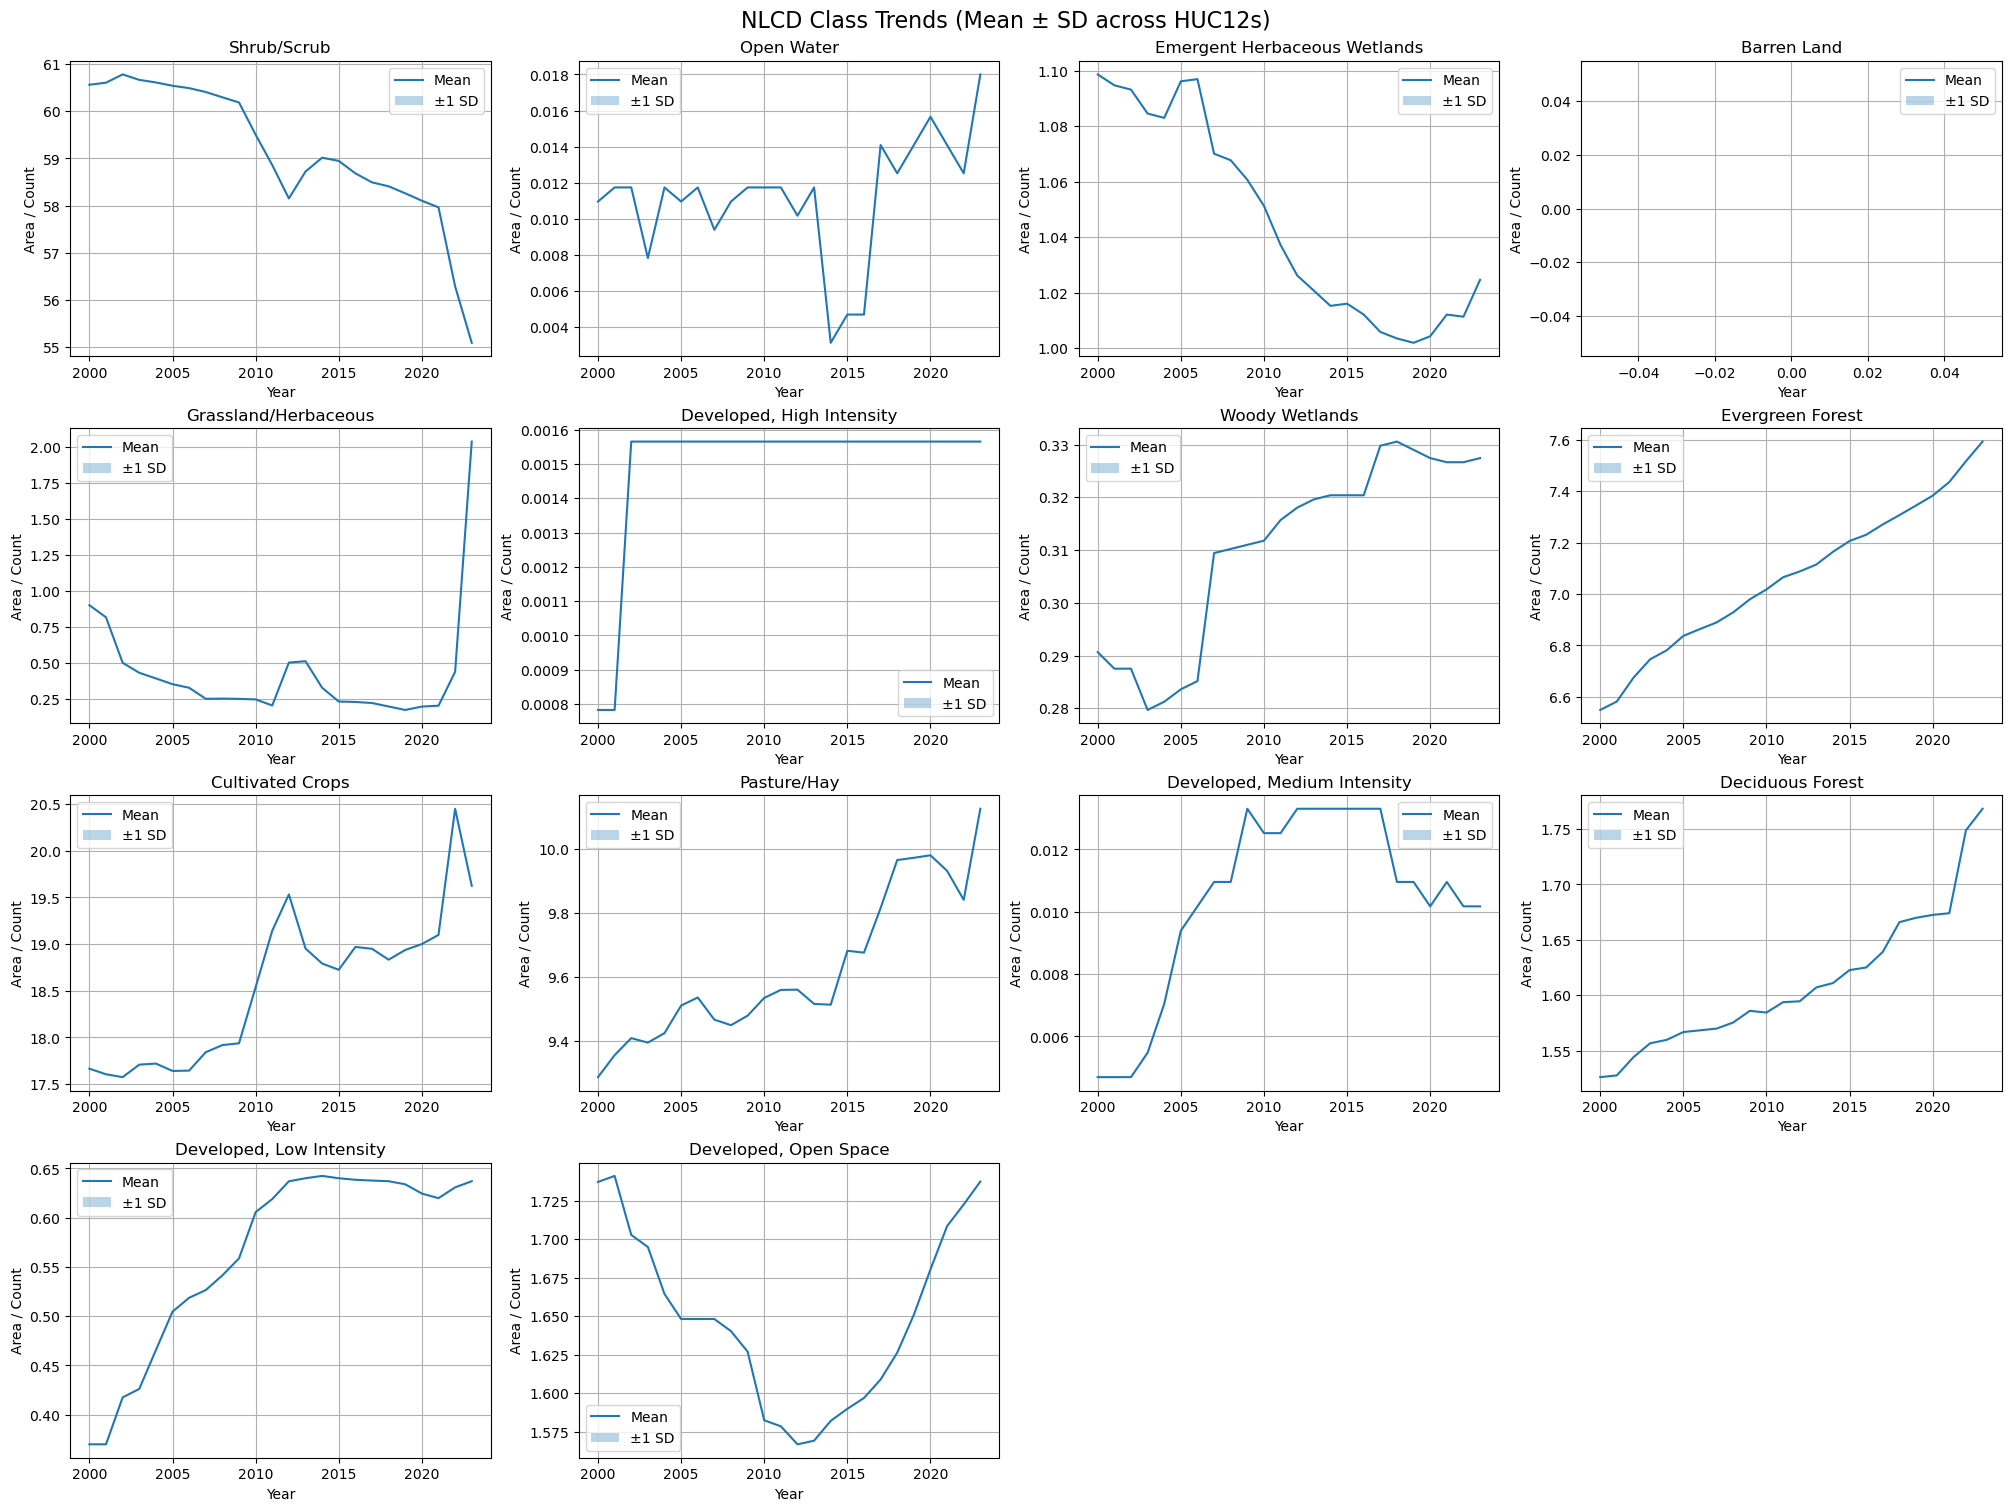

In [29]:
nlcd_columns = ['Shrub/Scrub', 'Open_Water', 'Emergent_Herbaceous_Wetlands', 'Barren_Land',
                'Grassland/Herbaceous', 'Developed,_High_Intensity', 'Woody_Wetlands',
                'Evergreen_Forest', 'Cultivated_Crops', 'Pasture/Hay',
                'Developed,_Medium_Intensity', 'Deciduous_Forest',
                'Developed,_Low_Intensity', 'Developed,_Open_Space']

# Group by Year and calculate mean and std for each NLCD class
grouped = t.groupby('Year')[nlcd_columns].agg(['mean', 'std'])

# Set up subplots
ncols = 4
nrows = int(len(nlcd_columns) / ncols) + (len(nlcd_columns) % ncols > 0)
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 15), constrained_layout=True)
axes = axes.flatten()

# Plot each NLCD class
for i, col in enumerate(nlcd_columns):
    ax = axes[i]
    years = grouped.index
    mean_vals = grouped[(col, 'mean')]
    std_vals = grouped[(col, 'std')]

    ax.plot(years, mean_vals, label='Mean')
    ax.fill_between(years, mean_vals - std_vals, mean_vals + std_vals, alpha=0.3, label='±1 SD')
    ax.set_title(col.replace('_', ' '))
    ax.set_xlabel('Year')
    ax.set_ylabel('Area / Count')
    ax.grid(True)
    ax.legend()

# Hide unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('NLCD Class Trends (Mean ± SD across HUC12s)', fontsize=16)
plt.show()
